# **Machine Learning Across Breast Cancer Cell Lines**
*Katia Russo, Enrico Adamo, Matteo Colantoni, Sofia Lambro, Andrea Porta*

## - Introduction : background / aim / objective 


## - Material and Methods : 

## **Step 1** : Dataset Overview – *Understanding the Files*


In [1]:
import os
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Before diving into data exploration or modeling, it’s critical to understand what data is available, its origin, and how it’s structured.
We are working with two different single-cell RNA sequencing technologies applied to two breast cancer cell lines, *MCF7* and *HCC1806*:
- SmartSeq datasets:
    - Metadata files
    - Unfiltered raw data
    - Filtered and normalised data both for training and testing
- DropSeq datasets:
    - Filtered and normalised data both for training and testing

#### SmartSeq - metadata files:
These files provide information about the cells that have been analyzed with the SmartSeq technology, such as their position or their condition (normoxia/hypoxia). The rows are the files representing each single cell, while the columns are the features.

In [4]:
# Load the metadata files
mcf_meta = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_MetaData.tsv", sep="\t", engine= "python", index_col=0)

# Inspect the shape and structure for MCF7
print("MCF7 Metadata")
print("Shape:", mcf_meta.shape)
print("First 5 rows:")
mcf_meta.head(5)

MCF7 Metadata
Shape: (383, 8)
First 5 rows:


,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
Filename,,,,,,,,
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


In [3]:
# Load the metadata files
hcc_meta = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_MetaData.tsv", sep="\t", engine= "python", index_col=0)

# Inspect the shape and structure for HCC1806
print("\nHCC1806 Metadata")
print("Shape:", hcc_meta.shape)
print("First 5 rows:")
hcc_meta.head(5)


HCC1806 Metadata
Shape: (243, 8)
First 5 rows:


,Cell Line,PCR Plate,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
Filename,,,,,,,,
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,HCC1806,1,A10,Normo,24,S123,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,HCC1806,1,A12,Normo,24,S26,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,HCC1806,1,A1,Hypo,24,S97,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,HCC1806,1,A2,Hypo,24,S104,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,HCC1806,1,A3,Hypo,24,S4,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


Now we download the actual sequencing data. Understanding the shape and the content of the data will give us insights on the structure of the datasets we are going to use.

#### SmartSeq - MCF7:

In [4]:
# Load the filtered dataset with the SmartSeq technology
dfs_mcf_unfiltered = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt", sep=r"\s+", engine= "python", index_col=0)
dfs_mcf_filtered = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Filtered_Data.txt", sep=r"\s+", engine= "python", index_col=0)
dfs_mcf_train = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0)
dfs_mcf_test = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0)

# Inspect the shape and structure for MCF7
print("MCF7 Unfiltered")
print("Dataframe dimension:", dfs_mcf_unfiltered.shape)
print("First column: ", dfs_mcf_unfiltered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Filtered")
print("Dataframe dimension:", dfs_mcf_filtered.shape)
print("First column: ", dfs_mcf_filtered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Filtered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Training Dataset")
print("Dataframe dimension:", dfs_mcf_train.shape)
print("First column: ", dfs_mcf_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Testing Dataset")
print("Dataframe dimension:", dfs_mcf_test.shape)
print("First column:", dfs_mcf_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")

MCF7 Unfiltered
Dataframe dimension: (22934, 383)
First column:  "WASH7P"       0
"MIR6859-1"    0
"WASH9P"       1
"OR4F29"       0
"MTND1P23"     0
Name: "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam", dtype: int64
File dimension: 20.10 MB

MCF7 Filtered
Dataframe dimension: (18945, 313)
First column:  "WASH7P"       0
"MIR6859-1"    0
"WASH9P"       1
"OR4F29"       0
"MTND1P23"     0
Name: "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam", dtype: int64
File dimension: 14.46 MB

MCF7 Training Dataset
Dataframe dimension: (3000, 250)
First column:  "CYP1B1"        343
"CYP1B1-AS1"    140
"CYP1A1"          0
"NDRG1"           0
"DDIT4"         386
Name: "output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam", dtype: int64
File dimension: 1.82 MB

MCF7 Testing Dataset
Dataframe dimension: (3000, 63)
First column: "CYP1B1"         492
"CYP1B1-AS1"     253
"CYP1A1"           0
"NDRG1"         1157
"DDIT4"         6805
Name: "1", dtype: int64
File dimension: 0.47 MB

#### SmartSeq - HCC1806

In [5]:
# Load the filtered dataset with the SmartSeq technology
dfs_hcc_unfiltered = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt", sep=r"\s+", engine= "python", index_col=0)
dfs_hcc_filtered = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Filtered_Data.txt", sep=r"\s+", engine= "python", index_col=0)
dfs_hcc_train = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0)
dfs_hcc_test = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0)

# Inspect the shape and structure for HCC1806
print("HCC1806 Unfiltered")
print("Dataframe dimension:", dfs_hcc_unfiltered.shape)
print("First column: ", dfs_hcc_unfiltered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Filtered")
print("Dataframe dimension:", dfs_hcc_filtered.shape)
print("First column: ", dfs_hcc_filtered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Filtered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Training Dataset")
print("Dataframe dimension:", dfs_hcc_train.shape)
print("First column: ", dfs_hcc_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Testing Dataset")
print("Dataframe dimension:", dfs_hcc_test.shape)
print("First column: ", dfs_hcc_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")

HCC1806 Unfiltered
Dataframe dimension: (23396, 243)
First column:  "WASH7P"      0
"CICP27"      0
"DDX11L17"    0
"WASH9P"      0
"OR4F29"      2
Name: "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam", dtype: int64
File dimension: 13.89 MB

HCC1806 Filtered
Dataframe dimension: (19503, 227)
First column:  "CICP27"        0
"DDX11L17"      0
"WASH9P"        0
"OR4F29"        2
"MTND1P23"    250
Name: "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam", dtype: int64
File dimension: 11.39 MB

HCC1806 Training Dataset
Dataframe dimension: (3000, 182)
First column:  "DDIT4"        0
"ANGPTL4"     48
"CALML5"       0
"KRT14"      321
"CCNB1"      298
Name: "output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam", dtype: int64
File dimension: 1.31 MB

HCC1806 Testing Dataset
Dataframe dimension: (3000, 45)
First column:  "DDIT4"        0
"ANGPTL4"      0
"CALML5"       0
"KRT14"      169
"CCNB1"      233
Name: "1", dtype: int64
File dime

We checked content and dimension of all the datasets we had for the SmartSeq technology. We can notice that we have the cells on the columns, while the rows are the genes, in this way the datasets give us information on the gene expression profiles in the cells. Moreover, the number of columns of the unfiltered data matches the number of rows of the metadatas, so we have information on the condition of each cell.

#### DropSeq - MCF7:

In [6]:
# Load the filtered dataset with the DropSeqSeq technology
dfd_mtf_train = pd.read_csv("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0)
dfd_mtf_test = pd.read_csv("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0)

# Inspect the shape and structure for MCF7
print("MCF7 Training Dataset")
print("Dataframe dimension:", dfd_mtf_train.shape)
print("First column: ", dfd_mtf_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Testing Dataset")
print("Dataframe dimension:", dfd_mtf_test.shape)
print("First column: ", dfd_mtf_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")

MCF7 Training Dataset
Dataframe dimension: (3000, 14682)
First column:  "H1-5"       2
"MALAT1"     3
"MT-RNR2"    0
"ARVCF"      0
"BCYRN1"     0
Name: "AAAAAACCCGGC_Normoxia", dtype: int64
File dimension: 84.37 MB

MCF7 Testing Dataset
Dataframe dimension: (3000, 3671)
First column:  "H1-5"       0
"MALAT1"     3
"MT-RNR2"    1
"ARVCF"      0
"BCYRN1"     2
Name: "1", dtype: int64
File dimension: 21.06 MB


#### DropSeq - HCC1806

In [7]:
# Load the filtered dataset with the DropSeqSeq technology
dfd_hcc_train = pd.read_csv("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0)
dfd_hcc_test = pd.read_csv("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0)


# Inspect the shape and structure for HCC1806
print("\nHCC1806 Training Dataset")
print("Dataframe dimension:", dfd_hcc_train.shape)
print("First column: ", dfd_hcc_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Testing Dataset")
print("Dataframe dimension:", dfd_hcc_test.shape)
print("First column: ", dfd_hcc_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")


HCC1806 Training Dataset
Dataframe dimension: (3000, 21626)
First column:  "MALAT1"     1
"MT-RNR2"    0
"NEAT1"      0
"H1-5"       0
"TFF1"       4
Name: "AAAAACCTATCG_Normoxia", dtype: int64
File dimension: 124.26 MB

HCC1806 Testing Dataset
Dataframe dimension: (3000, 5406)
First column:  "MALAT1"     0
"MT-RNR2"    0
"NEAT1"      0
"H1-5"       0
"TFF1"       3
Name: "1", dtype: int64
File dimension: 31.00 MB


At first sight we can immediately notice the difference in dimension between SmartSeq and DropSeq datasets, given by how each technology works.

For both technologies we have the training and testing datasets where have been retained exactly 3000 genes, probably the most variable ones. We are going to use them for training and testing our model.

The absence of metadata files for the DropSeq experiment make us think that we need two different approach when analyzing the different techniques, probably requiring unsupervised learning for the latter.

---

## **Step 2** : Exploratory Data Analysis

We now will go deeper in the analysis of the row data, exploring both cell lines independently.

### **MCF7 Cell Line**

### **2.1** Data Integrity Checks

#### - *Check Data Type*
We are going to verify that data is all numeric where needed and that the gene identifier are of consistent type.

#### - *Check Missing Values*

#### - *Check for Duplicate Genes*

-------

### **HCC1806 Cell line**

### **2.1** Data Integrity Checks

#### - *Check Missing Values*

In [18]:
dfs_hcc_unfiltered.isnull().values.any()

np.False_

#### - *Check Data Types*
We are going to verify that data is all numeric where needed and that the gene identifier are of consistent type.

In [12]:
dfs_hcc_unfiltered.dtypes

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     int64
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"       int64
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"      int64
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"        int64
                                                                          ...  
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"      int64
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"     int64
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"     int64
Length: 243, dtype: object

In [13]:
(dfs_hcc_unfiltered.dtypes=="int64").all()

np.True_

This ensures that all the entries are integers.

In [15]:
gene_symbols_hcc = dfs_hcc_unfiltered.index
print("Dataframe indexes:", gene_symbols_hcc)

Dataframe indexes: Index(['"WASH7P"', '"CICP27"', '"DDX11L17"', '"WASH9P"', '"OR4F29"',
       '"MTND1P23"', '"MTND2P28"', '"MTCO1P12"', '"MTCO2P12"', '"MTATP8P1"',
       ...
       '"MT-TH"', '"MT-TS2"', '"MT-TL2"', '"MT-ND5"', '"MT-ND6"', '"MT-TE"',
       '"MT-CYB"', '"MT-TT"', '"MT-TP"', '"MAFIP"'],
      dtype='object', length=23396)


#### - *Check All Zero Rows/Columns*

In [41]:
gene_totals_hcc = dfs_hcc_unfiltered.sum(axis=1)
cell_totals_hcc = dfs_hcc_unfiltered.sum(axis=0)
dfs_hcc_f1 = dfs_hcc_unfiltered.loc[gene_totals_hcc >= 20, cell_totals_hcc >= 5000]
dfs_hcc_f1

,"""output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"""
"""CICP27""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""DDX11L17""",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""WASH9P""",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
"""OR4F29""",2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""MTND1P23""",250,424,11,63,27,81,305,82,46,177,...,205,113,47,27,35,146,37,83,47,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""MT-TE""",22,43,0,0,0,3,47,4,2,8,...,24,15,15,4,4,26,1,4,4,20
"""MT-CYB""",4208,6491,25,4819,310,695,2885,1552,366,1829,...,1119,1429,808,999,916,3719,984,2256,981,2039
"""MT-TT""",26,62,0,11,4,0,41,9,2,8,...,48,31,3,8,5,42,1,15,6,34
"""MT-TP""",66,71,1,3,9,14,91,22,3,30,...,119,52,11,22,15,48,18,36,8,79


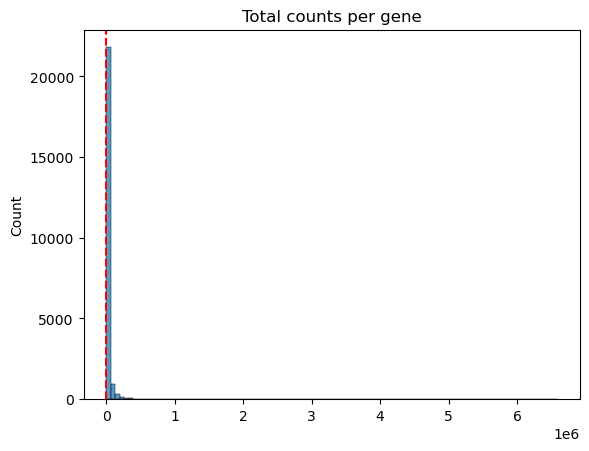

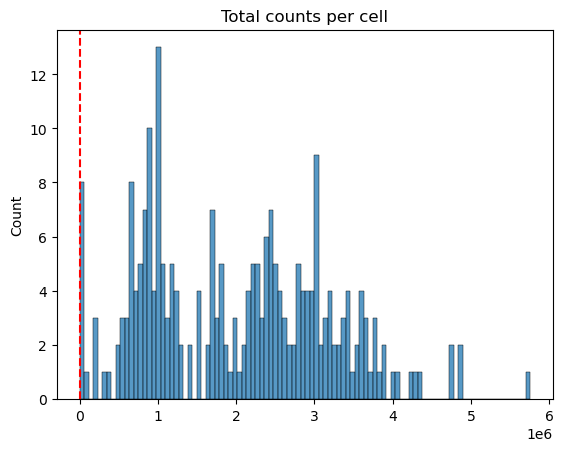

In [42]:
sns.histplot(gene_totals_hcc, bins=100, kde=False)
plt.axvline(20, color='red', linestyle='--')
plt.title("Total counts per gene")
plt.show()

sns.histplot(cell_totals_hcc, bins=100, kde=False)
plt.axvline(5000, color='red', linestyle='--')
plt.title("Total counts per cell")
plt.show()

#### - *Check Duplicate Genes*

In [24]:
dfs_hcc_unfiltered.duplicated().any()

np.True_

In [ ]:
duplicate_rows_hcc = dfs_hcc_unfiltered.duplicated(keep=False)
dfs_hcc_unfiltered[duplicate_rows_hcc]

,"""output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"""
"""MMP23A""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""LINC01647""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""LINC01361""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""ITGA10""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""RORC""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""ENPP7""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""DTNA""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""ALPK2""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""OR7G2""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(dfs_hcc_unfiltered[duplicate_rows_hcc].index.tolist())

['"MMP23A"', '"LINC01647"', '"LINC01361"', '"ITGA10"', '"RORC"', '"GPA33"', '"OR2M4"', '"LINC01247"', '"SNORD92"', '"LINC01106"', '"ZBTB45P2"', '"AOX3P"', '"CPS1"', '"RPS3AP53"', '"CCR4"', '"RNY1P12"', '"C4orf50"', '"C4orf45"', '"PCDHA2"', '"PCDHA8"', '"PCDHGA2"', '"PCDHGA3"', '"PCDHGB3"', '"PCDHGA7"', '"PCDHGA9"', '"PCDHGB7"', '"PCDHGA12"', '"PCDHGB9P"', '"PCDHGC4"', '"SMIM23"', '"PANDAR"', '"LAP3P2"', '"RBBP4P3"', '"RPL21P66"', '"VNN3"', '"TRPV6"', '"CNPY1"', '"ASS1P4"', '"SLC7A3"', '"MIR374B"', '"MIR374C"', '"NAB1P1"', '"RPL10AP3"', '"MIR548AA1"', '"MIR548D1"', '"SCARNA8"', '"MIR3074"', '"MIR24-1"', '"SUGT1P4-STRA6LP"', '"STRA6LP"', '"KCNA4"', '"FBLIM1P2"', '"APLNR"', '"CYCSP26"', '"OPCML"', '"B3GAT1-DT"', '"RPL21P88"', '"LINC02625"', '"RPL22P18"', '"PAX2"', '"SOX5"', '"COL2A1"', '"LINC02395"', '"LDHAL6CP"', '"CUX2"', '"LINC00621"', '"NUS1P2"', '"UBBP5"', '"OR5AU1"', '"LINC02833"', '"RASL12"', '"CILP"', '"MIR6864"', '"MIR4520-1"', '"MIR4520-2"', '"CCL3L3"', '"CCL3L1"', '"RNU6-826P"'